In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_excel('MLR.xlsx')

In [4]:
df

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


In [6]:
df.corr()

,AT,V,AP,RH,PE
AT,1.000000,0.844107,-0.507549,-0.542535,-0.948128
V,0.844107,1.000000,-0.413502,-0.312187,-0.869780
AP,-0.507549,-0.413502,1.000000,0.099574,0.518429
RH,-0.542535,-0.312187,0.099574,1.000000,0.389794
PE,-0.948128,-0.869780,0.518429,0.389794,1.000000


In [7]:
x = df.drop(['PE'],axis=1)

In [8]:
x

,AT,V,AP,RH
0,14.96,41.76,1024.07,73.17
1,25.18,62.96,1020.04,59.08
2,5.11,39.40,1012.16,92.14
3,20.86,57.32,1010.24,76.64
4,10.82,37.50,1009.23,96.62
...,...,...,...,...
9563,16.65,49.69,1014.01,91.00
9564,13.19,39.18,1023.67,66.78
9565,31.32,74.33,1012.92,36.48
9566,24.48,69.45,1013.86,62.39


In [9]:
y = df.PE

In [10]:
y

0       463.26
1       444.37
2       488.56
3       446.48
4       473.90
         ...  
9563    460.03
9564    469.62
9565    429.57
9566    435.74
9567    453.28
Name: PE, Length: 9568, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size=0.3,
                                                random_state=0)

In [14]:
x_train

,AT,V,AP,RH
4507,15.83,41.67,1013.39,74.12
287,22.56,62.26,1012.11,63.16
4018,22.11,59.80,1016.86,70.14
4624,19.96,56.03,1020.59,64.95
8507,21.70,70.32,1009.12,91.30
...,...,...,...,...
7891,16.21,50.90,1012.46,84.45
9225,13.85,44.90,1019.11,76.79
4859,16.81,38.52,1018.26,75.21
3264,12.80,41.16,1022.43,86.19


In [15]:
x_test

,AT,V,AP,RH
4834,28.66,77.95,1009.56,69.07
1768,17.48,49.39,1021.51,84.53
2819,14.86,43.14,1019.21,99.14
7779,22.46,58.33,1013.21,68.68
7065,18.38,55.28,1020.22,68.33
...,...,...,...,...
9339,13.21,40.56,1018.12,64.49
4871,11.77,40.71,1024.55,72.49
5128,31.63,68.30,1014.80,42.02
7947,25.12,77.95,1009.26,82.95


In [16]:
len(y_test)

2871

In [17]:
len(x_test)

2871

# Train the Model on the Training Data

In [19]:
# Using Linear Regression

from sklearn.linear_model import LinearRegression

In [20]:
lr = LinearRegression()

In [21]:
lr.fit(x_train,y_train)

LinearRegression()

In [22]:
y_pred = lr.predict(x_test)

In [25]:
len(y_pred)

2871

In [24]:
lr.predict([[25.18,62.96,1020.04,59.08]])

array([444.11308796])

# Model Evaluation

In [26]:
from sklearn.metrics import r2_score

In [28]:
r2_score(y_test,y_pred).round(2)

0.93

Text(0.5, 1.0, 'ACTUAL VS PREDICTED')

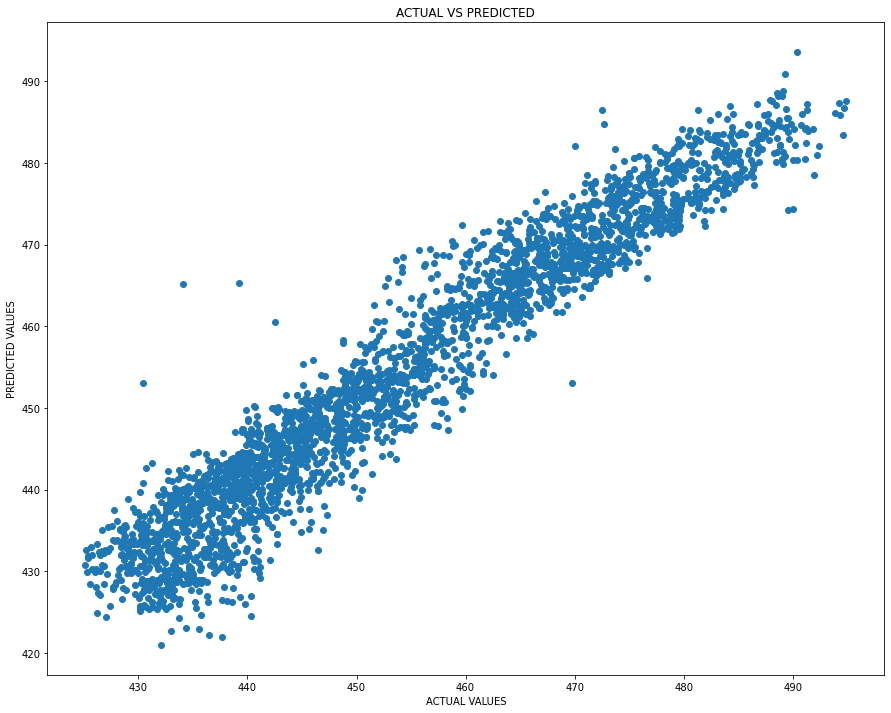

In [29]:
plt.figure(figsize=(15,12))

plt.scatter(y_test,y_pred)
plt.xlabel('ACTUAL VALUES')
plt.ylabel('PREDICTED VALUES')
plt.title("ACTUAL VS PREDICTED")

In [30]:
# Predicted Points

p_d = pd.DataFrame({'ACTUAL':y_test,'PREDICTED':y_pred,
                   'Difference': y_test-y_pred})

In [31]:
p_d

,ACTUAL,PREDICTED,Difference
4834,431.23,431.402451,-0.172451
1768,460.01,458.614741,1.395259
2819,461.14,462.819674,-1.679674
7779,445.90,448.601237,-2.701237
7065,451.29,457.879479,-6.589479
...,...,...,...
9339,475.86,472.027234,3.832766
4871,477.94,474.005522,3.934478
5128,426.86,432.473808,-5.613808
7947,433.40,436.164172,-2.764172


In [33]:
p_d.Difference.min()

-31.040794774084986